In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from subprocess import check_output

df = pd.read_csv(r"C:\Users\kofen\Downloads\vgsales.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [19]:
df.isna().sum()

Rank                     0
Name                     0
Platform                 0
Year                   271
Genre                    0
Publisher                0
NA_Sales                 0
EU_Sales                 0
JP_Sales                 0
Other_Sales              0
Global_Sales             0
Years_Since_Release    271
Sales_Per_Year         271
dtype: int64

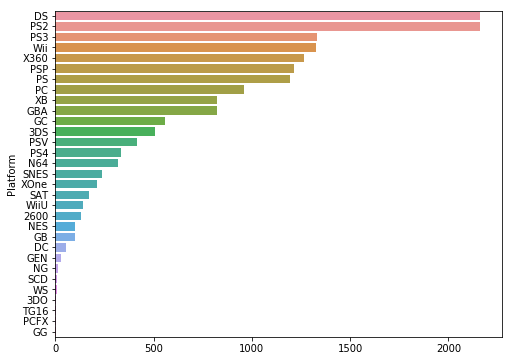

In [6]:
## I want to know how many games each platform has. i found a function called crosstab that helps
## me with visualizing this.
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

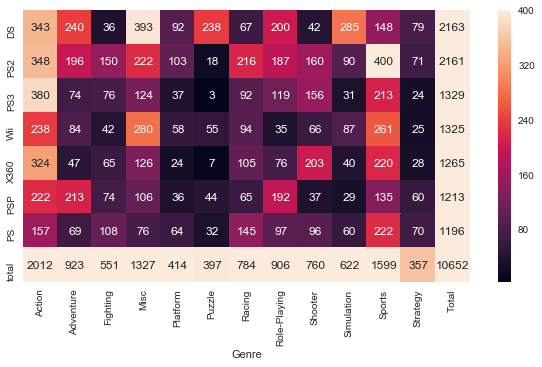

In [7]:
## Now i want to focus on the platforms that have 1000 or more games.
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=1.0)
plt.figure(figsize=(10,5))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

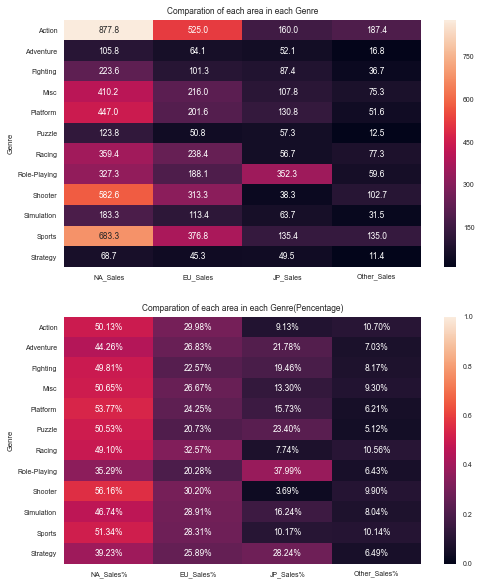

In [8]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

In [9]:
df['Years_Since_Release'] = 2018 - df['Year']
df['Sales_Per_Year'] = df['Global_Sales'] / df['Years_Since_Release']

In [10]:
df.sort_values('Sales_Per_Year', ascending=False).nlargest(200, 'Sales_Per_Year')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years_Since_Release,Sales_Per_Year
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,12.0,6.895000
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,3.0,4.746667
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,5.0,4.280000
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,9.0,3.666667
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,10.0,3.582000
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,5.0,3.276000
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,9.0,3.180000
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,4.0,2.995000
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,5.0,2.870000
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,4.0,2.832500


In [11]:
#I need to convert some categorical data to numerical data. I use LabelEncoder for this. I will only do
# this for the data that i think is useful for my current project.
number = LabelEncoder()
df['Platform'] = number.fit_transform(df['Platform'].astype('str'))
df['Genre'] = number.fit_transform(df['Genre'].astype('str'))
df['Publisher'] = number.fit_transform(df['Publisher'].astype('str'))

In [16]:
dff = df.drop(['Rank','Name', 'Year'], axis =1)

df3 = dff.drop(['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'], axis =1)

#columns = ["Platform", "Genre", "Publisher"]
columns = ["Platform", "Genre", "Publisher", "NA_Sales", "EU_Sales"]

  
labels = df3["Global_Sales"].values
features = dff[list(columns)].values

regr = linear_model.LinearRegression()

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler = StandardScaler()
#scaler = preprocessing.MinMaxScaler()

# Fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("Accuracy in the training data: ", Accuracy*100, "%")

accuracy = regr.score(X_test, y_test)
print ("Accuracy in the test data", accuracy*100, "%")

Accuracy in the training data:  96.8400380274285 %
Accuracy in the test data 95.36069637917015 %


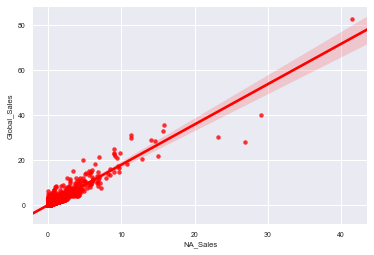

In [13]:
sns.regplot(x=dff.NA_Sales, y=dff.Global_Sales, data=dff, marker='o', color='red', scatter_kws={'s':20});